## 연도별 이미지넷 우승 모델 
이미지넷 분류 대회 ILSVRC(ImageNet Large-Scale Visual Recognition Challenge)의 우승작 모델들 보기<br>
-> 결론적으로 네트워크의 파라미터 개수는 줄어들고, 뎁스는 증가하며, 성능도 증가한다.

### AlexNet
네트워크가 2개로 나뉨. (GPU가 부족했기 때문)<br>
8레이어로 깊진 않지만, 2011년인걸 감안하면 깊다.<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>


**Key Idea**
1. ReLU 활성함수 사용 (Gradient Vanishing 방지)
2. 2개 GPU 사용
3. Local response normalization(sparse 매트릭스를 만들기 위해, 인풋에서 response가 많이 나오는애들 죽이는 것, 지금은 많이 안씀.), Overlapping pooling
4. Data augmentation(데이터 증강)
5. Dropout
지금 보면, 당연히 사용하는 것인데, 이 때에는 흔치 않았다 -> 지금의 잘되는 기준을 당시에 잡아준 것.<br>

<br>
<div>
    <img src=attachment:image-2.png width=800>
</div>
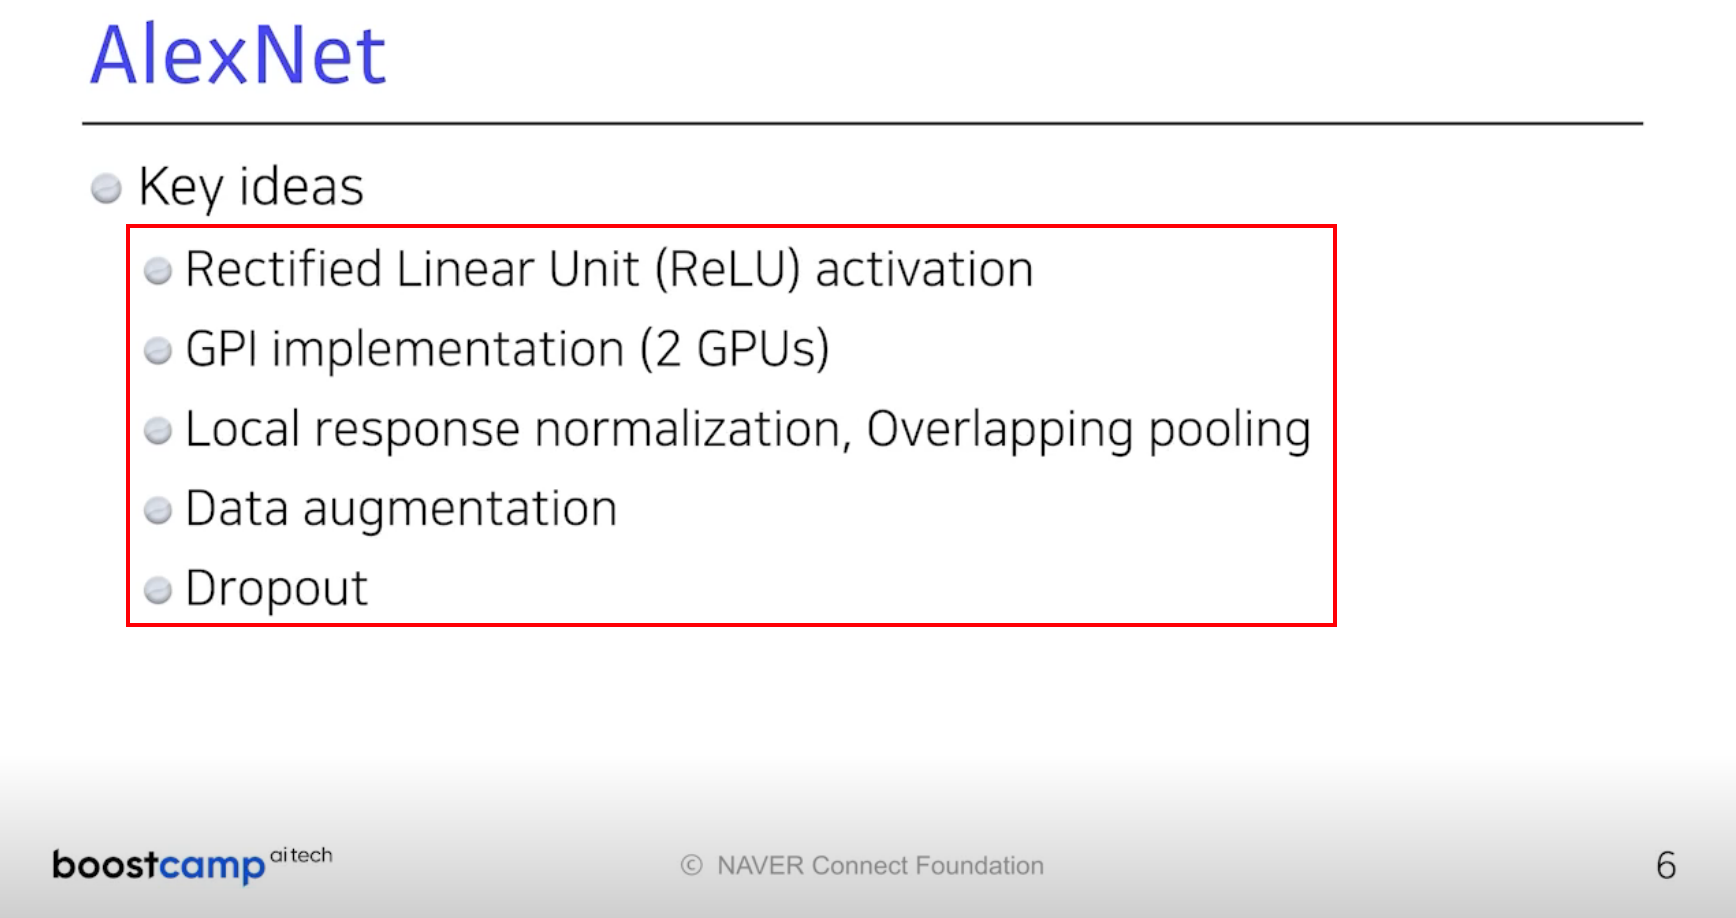
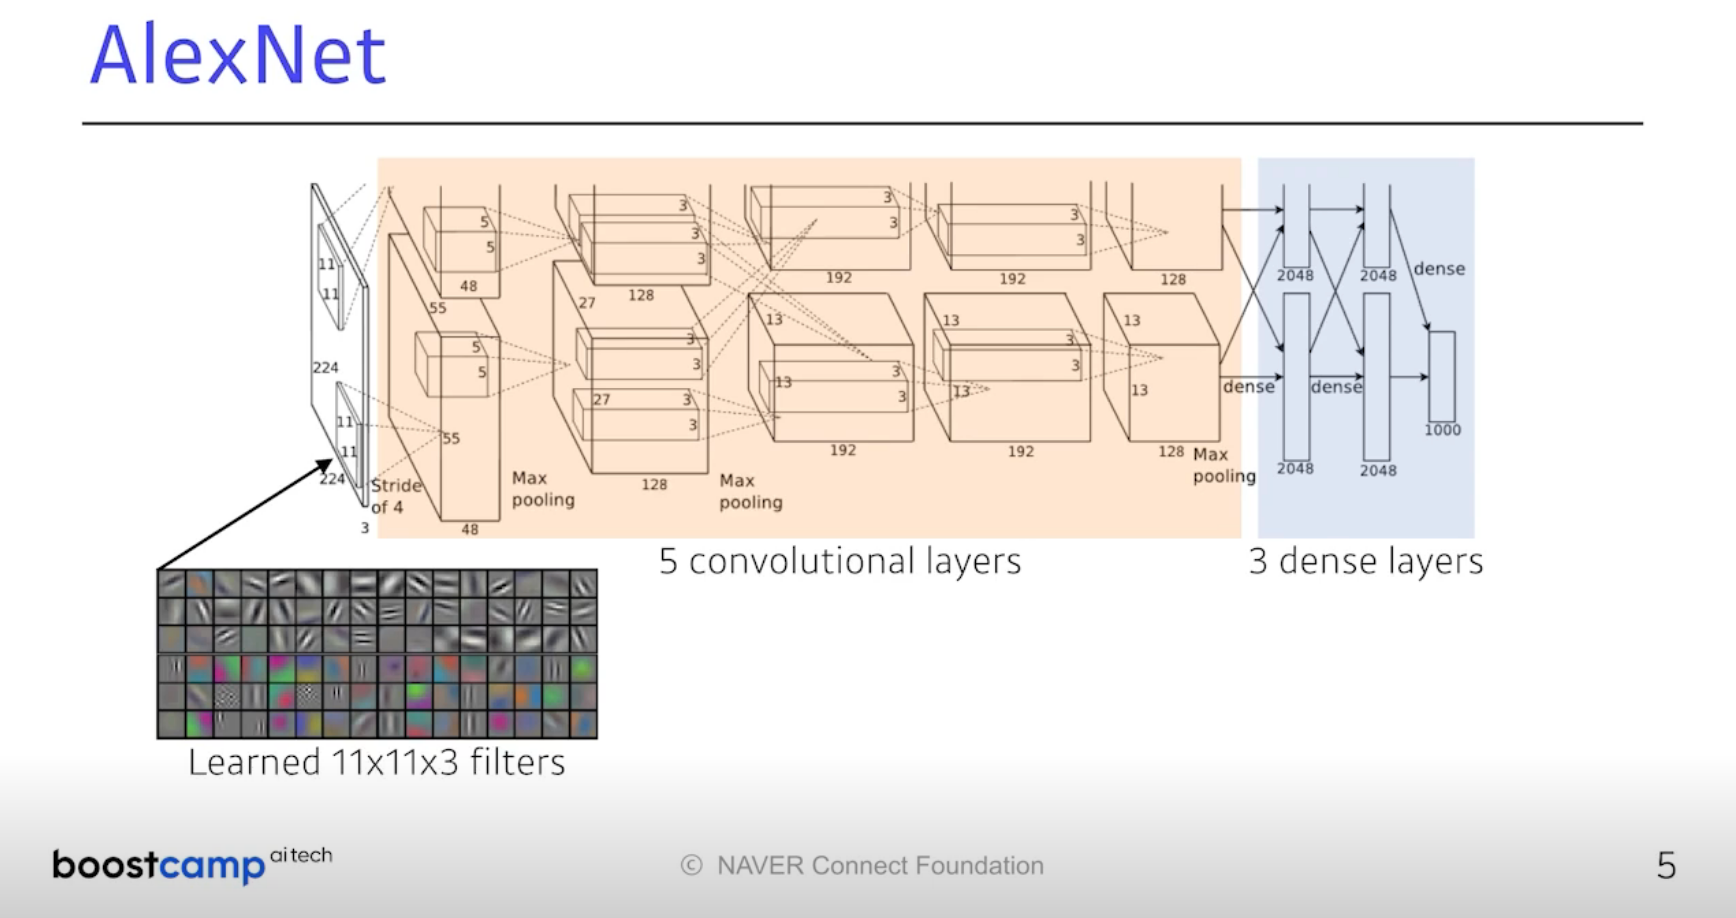

### VGGNet
1. **3x3 convolution 필터'만' 사용함**가 가장 중요<br>
2. 1x1 convolution을 사용하긴 했는데, 중요한 팩터는 아님<br>
3. Dropout(p=0.5)
4. VGG16, VGG19 (레이어 16, 19 사용)
<br>
<div>
    <img src=attachment:image-2.png width=800>
</div>
<br>

<br>
3x3을 2번 사용하면, 사실 5x5를 1번 사용한 것과 같은 효과를 갖는다.<br>
하지만 3x3을 2번 사용한것이 깊이는 더 깊고, 파라미터 개수는 더 적다.<br>
<div>
    <img src=attachment:image.png width=800>
</div>
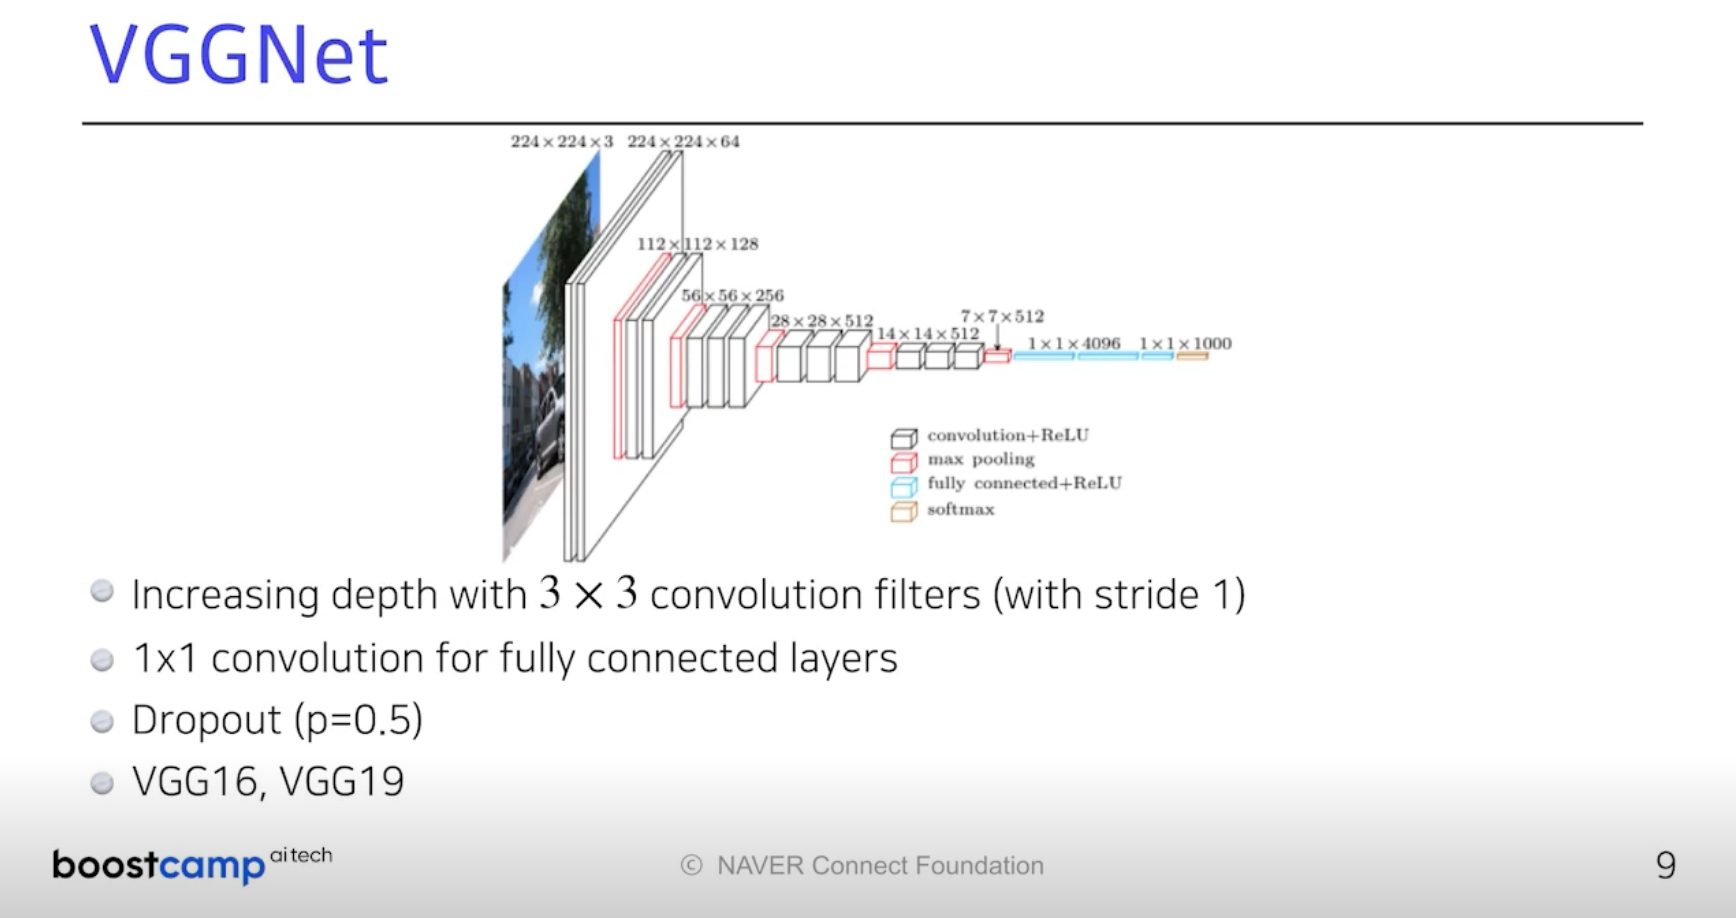
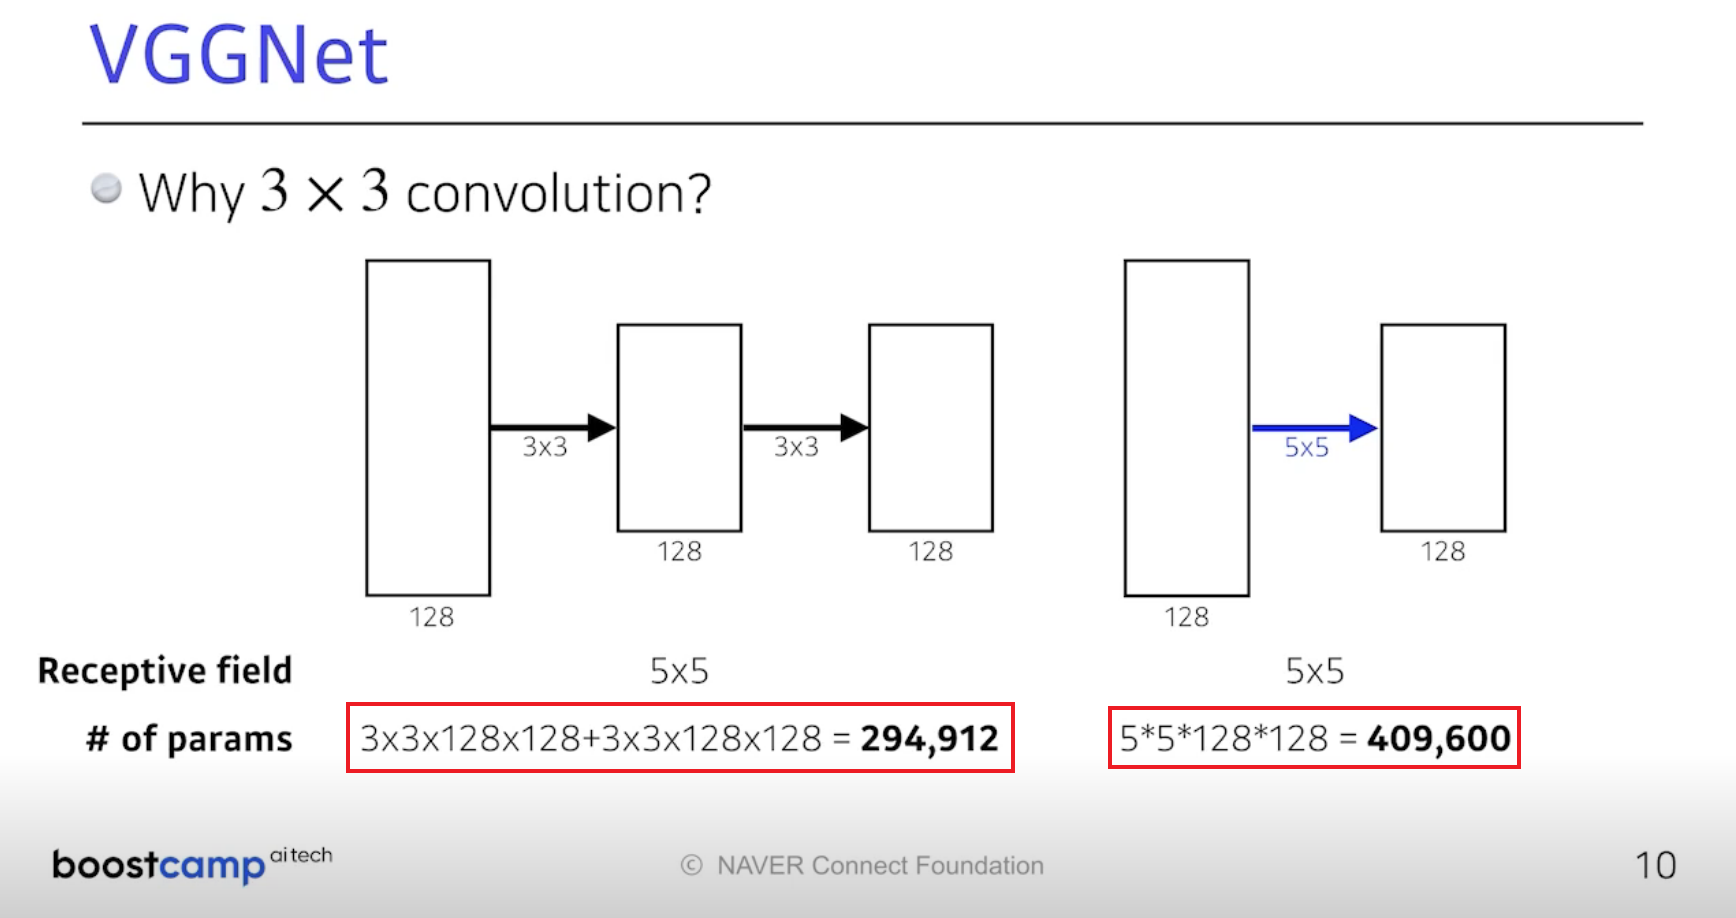

### GoogleNet
비슷한 네트워크가 GoogleNet안에서 반복된다. -> 네트워크 안에 네트워크가 있다고 해서 NiN(Network in Network)라고 한다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
반복되는 네트워크 -> Inception blocks라고 한다<br>
1x1 Conv가 중간에 끼어들어감으로써 전체적인 네트워크의 파라미터 개수를 줄인다.<br>
어떻게? 1x1 convolution은 채널을 줄일 수 있기 때문이다.<br>
<br>

<div>
    <img src=attachment:image-2.png width=800>
</div>

<br>
<br>
1x1 CONV가 파라미터 개수 줄이는 예시
128 -> 128로 3x3 필터를 사용했을 땐, 15만개정도 파라미터가 사용됨.<br>
128을 1x1을 이용해 32로 채널을 줄이고, 3x3을 사용하면 총 4만개 정도 파라미터가 사용되는것으로 확 줄어든다.<br>
2가지 입력과 출력만 놓고보면 완전 똑같은데 파라미터 개수가 1/3 수준으로 줄어들었다.<br>
<br>
<div>
    <img src=attachment:image-3.png width=800>
</div>

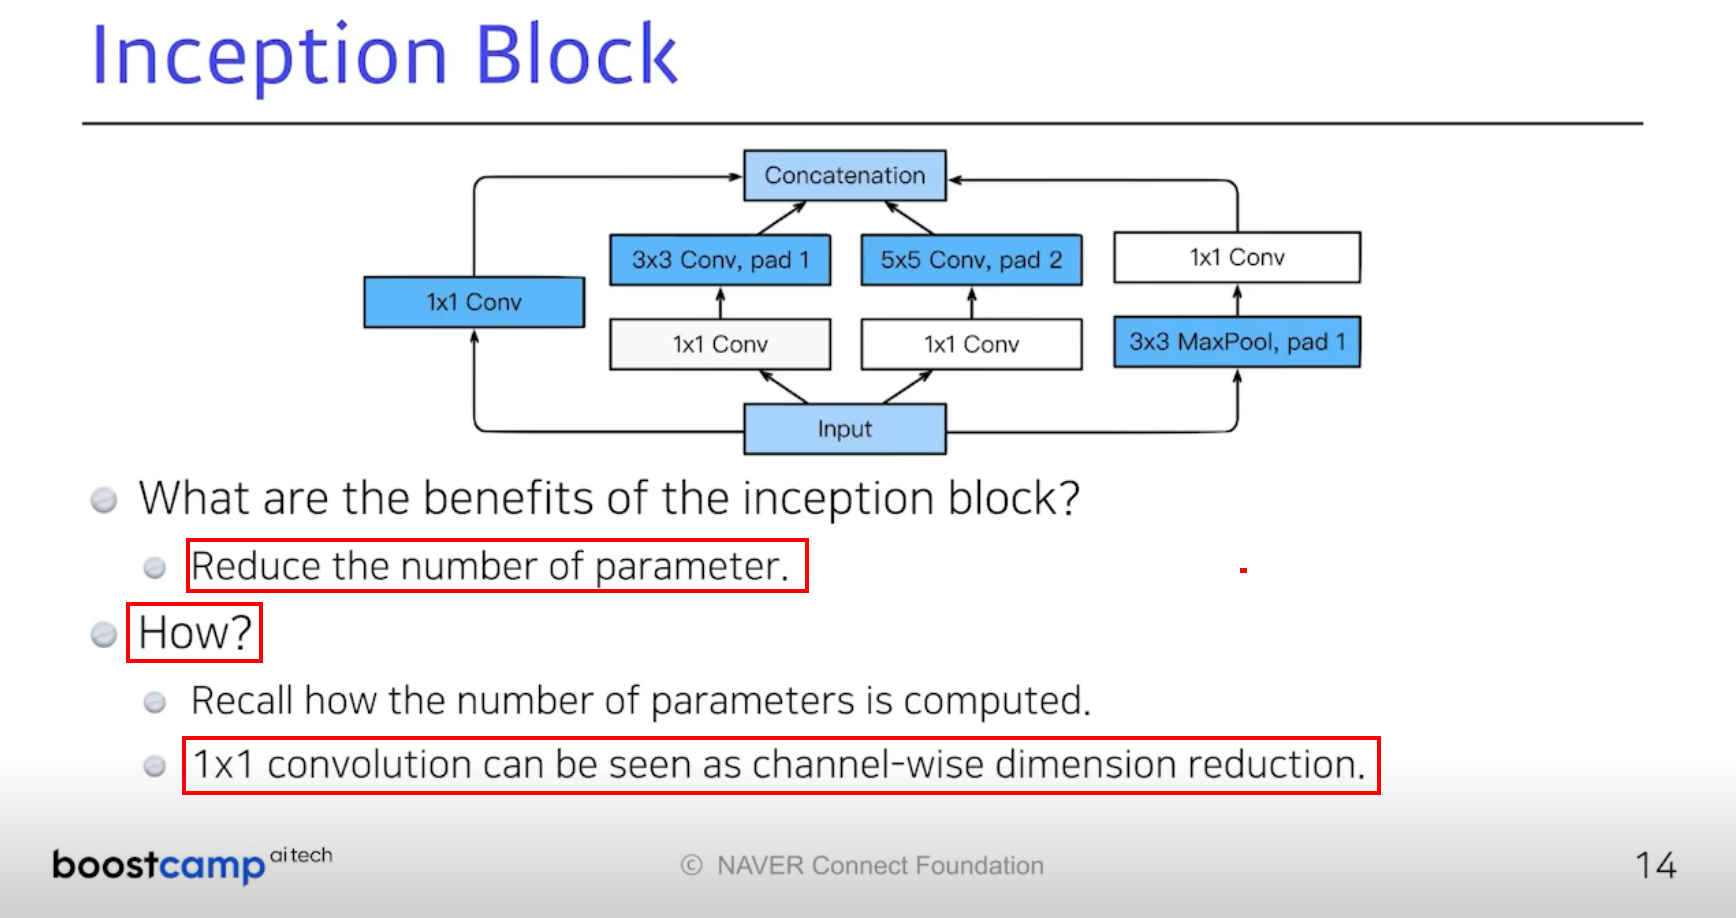
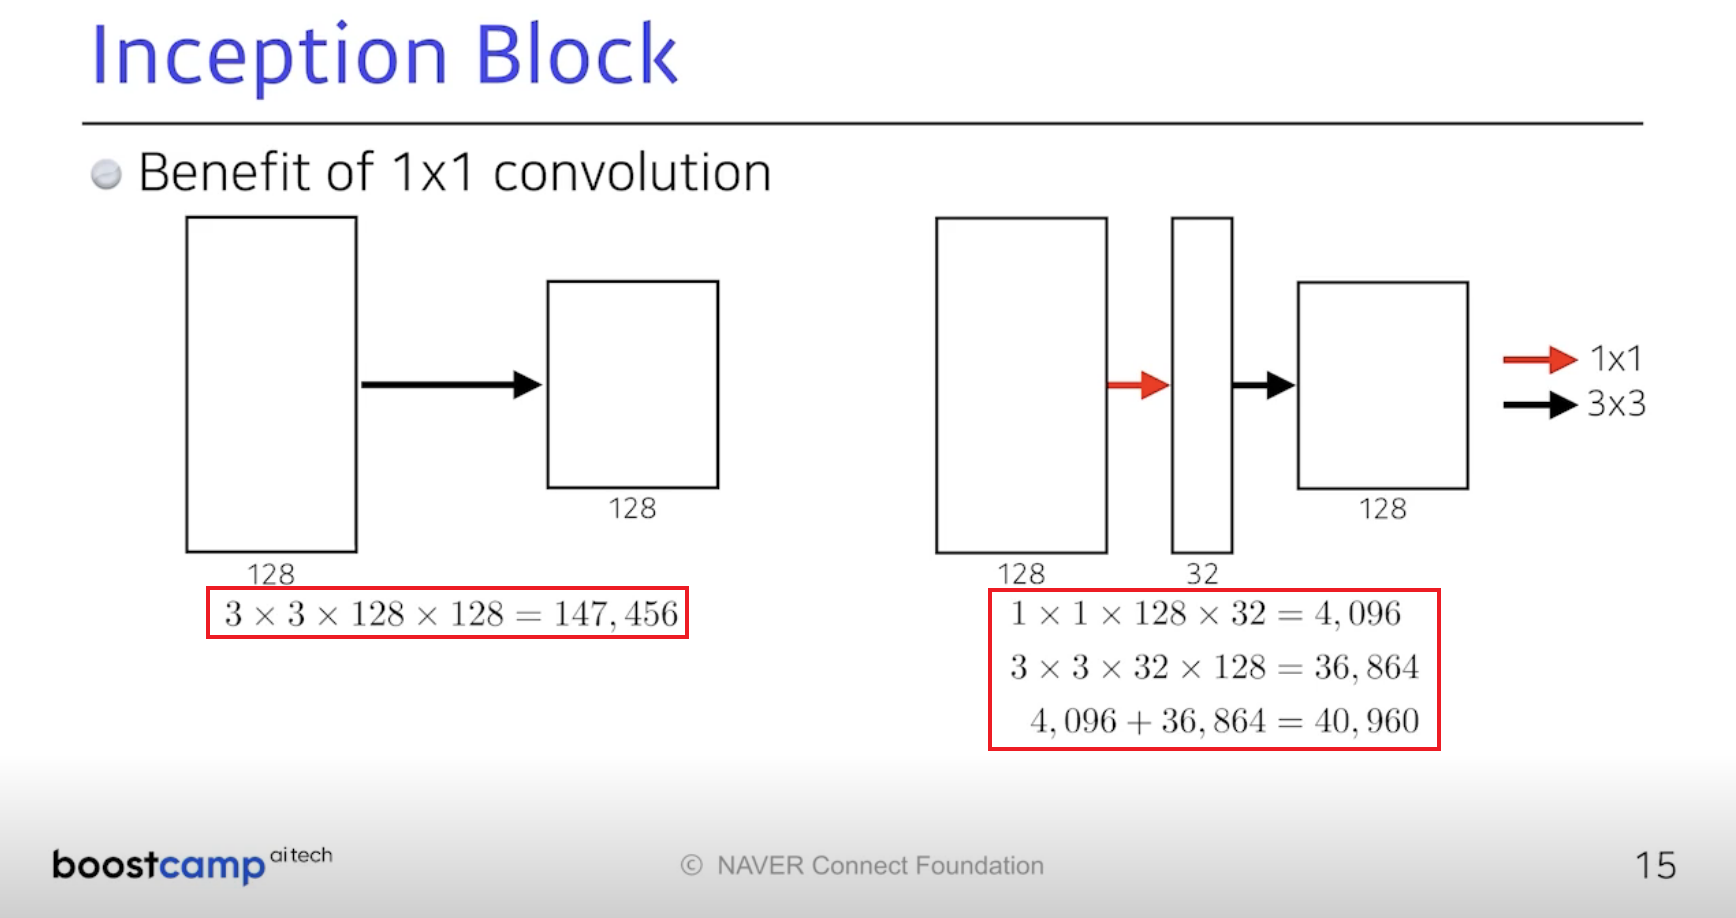
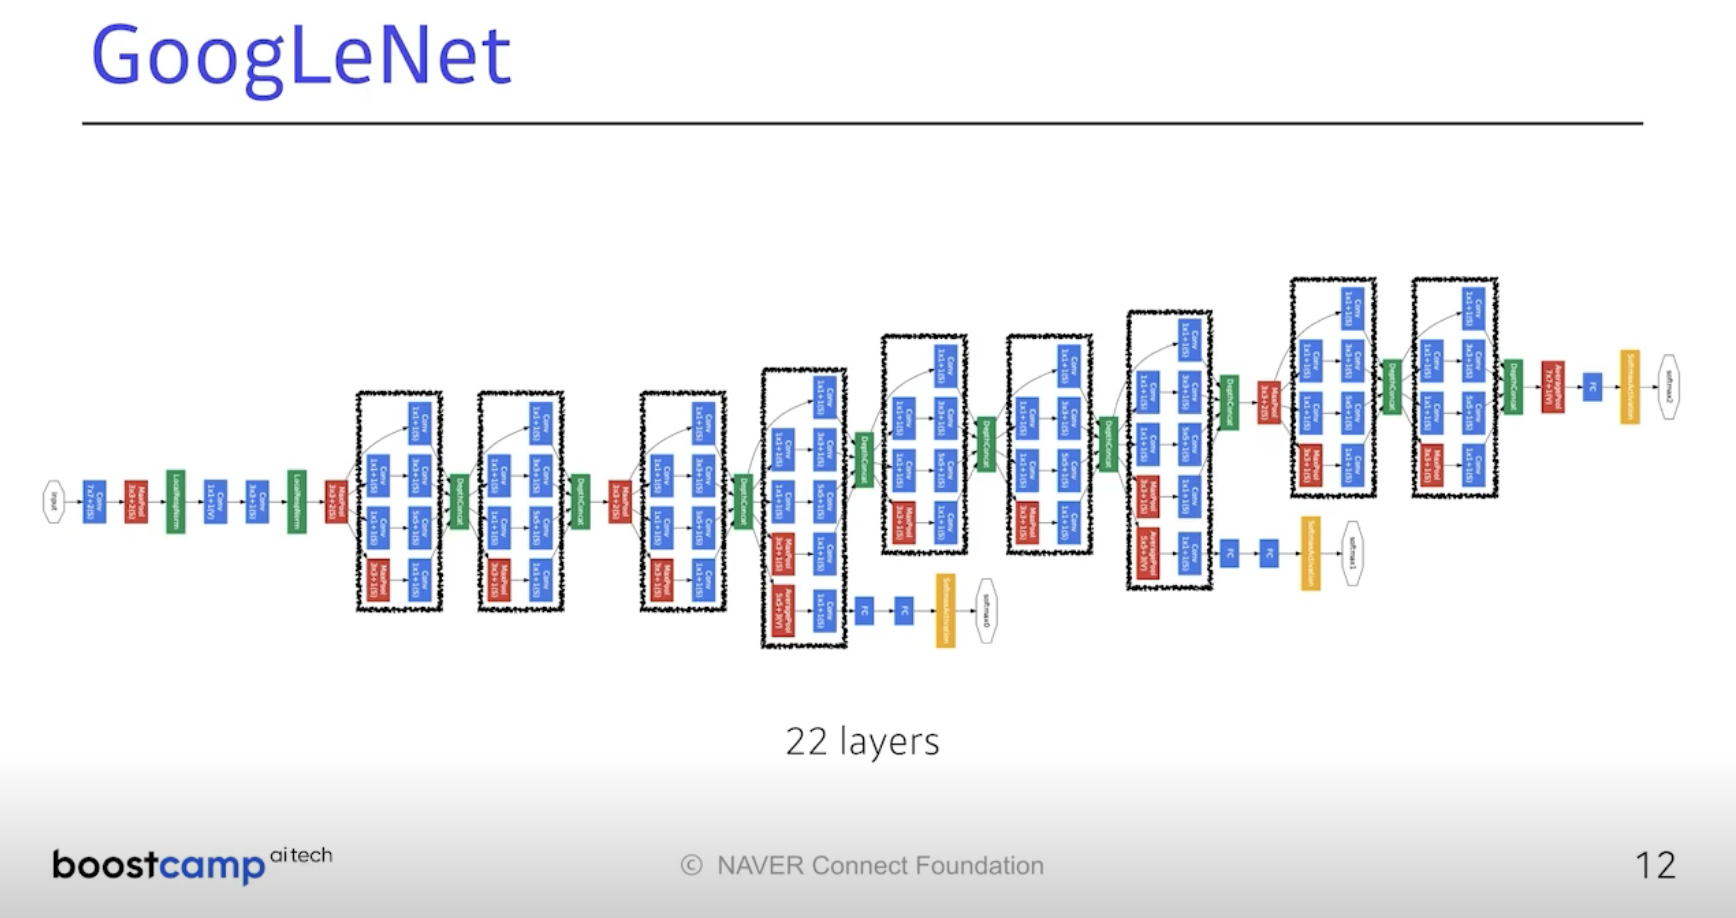

### Quiz
AlexNet, VGGNet, GoogleNet 파라미터 개수는 어느정도될까요?<br>
아래를 보면 GoogleNet이 22레이어로 제일 깊은데 파라미터 개수는 4M으로 확 준것을 볼 수 있다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
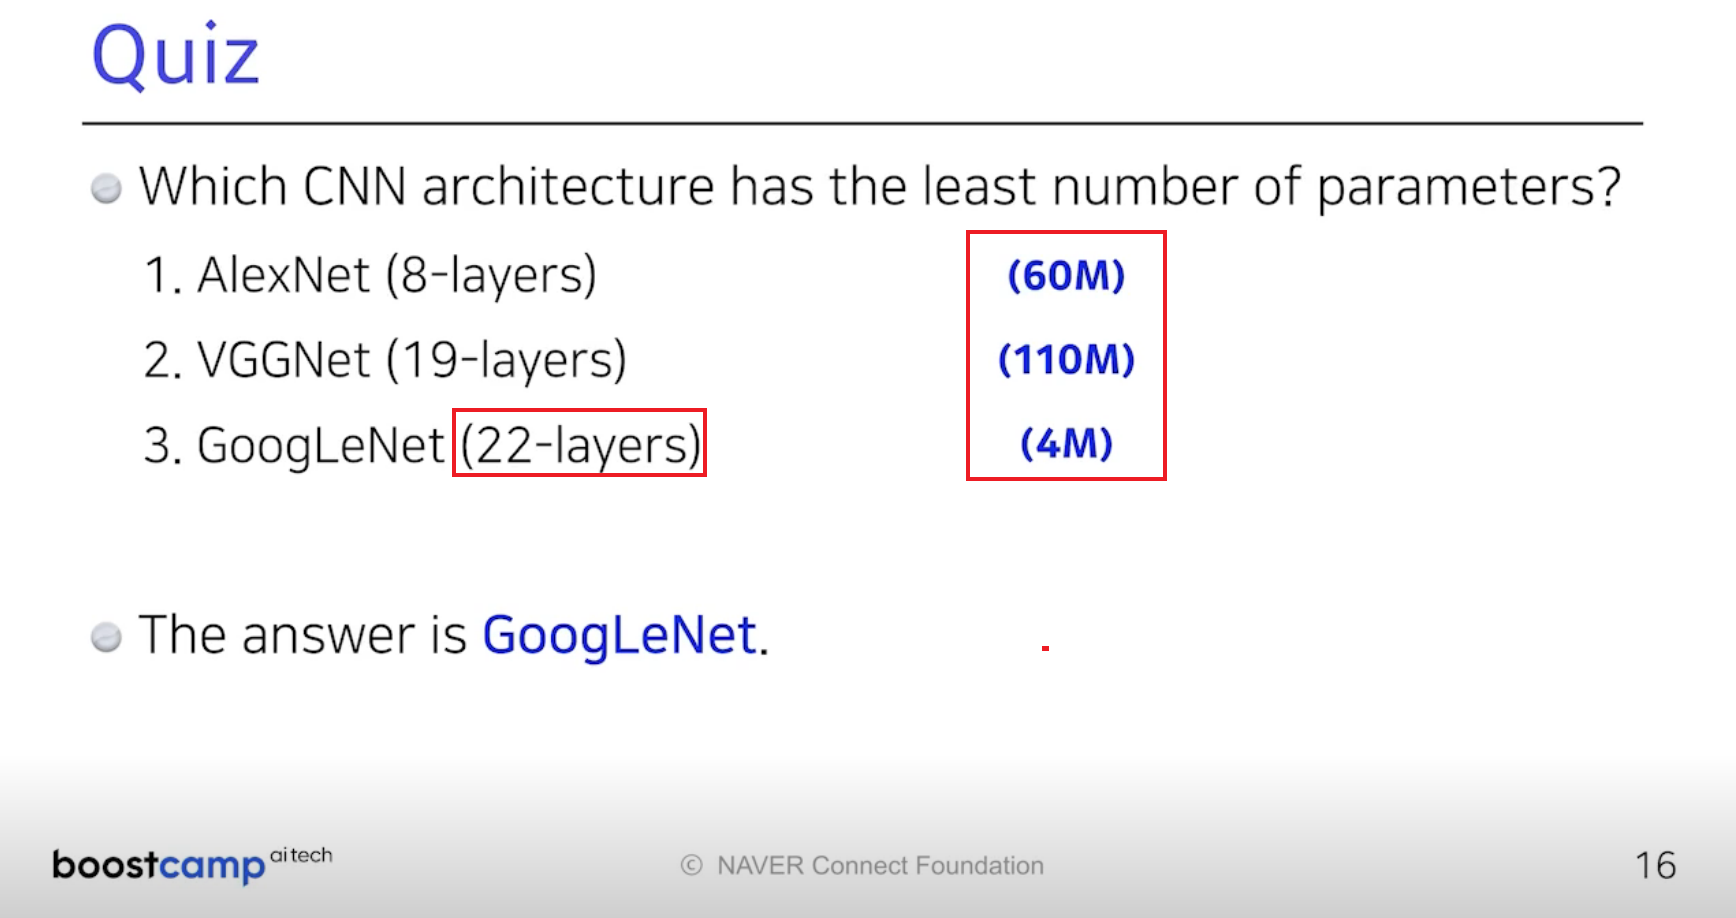

### ResNet
파라미터 개수가 많아지면 일반적으로 오버피팅 문제가 발생한다. 여기서 오버피팅은 Genralization 성능이 낮아지는 것(트레이닝에선 낮아지는데, 테스트에선 에러 높은것)이 아니라<br>
여기서 트레이닝 에러와 테스트에러가 같이 줄어드는데, 트레이닝 에러가 낮아지는데도 새츄레이션된 테스트 에러는 더이상 낮아지지 않는것.<br>
특히 네트워크가 20-layer보다 56-layer로 커지면 학습 자체가 잘 안되버리는 문제가 발생<br>
<br>

<div>
    <img src=attachment:image.png width=800>
</div>
<br>

<br>
그래서 ResNet에선 이 문제를 해결하기 위해, identity map(residual connection)이라는 단계를 추가한다.<br>
기존엔 한 층을 지날 때, Weight Layer와 Activation Function으로 이루어진 함수를 지나 값이 f(x)였는데, 그 값에 x를 더하는 단계를 추가했다.<br>
즉, f(x)가 f(x)+x로 바뀐 것이다. 그러면, Convolution Layer가 학습하고자 하는 양을 차이만큼만 학습하도록 하는것.<br>
<br>
<div>
    <img src=attachment:image-2.png width=800>
</div>
<br>
<br>
이런 identity map(residual connection)이라는 단계를 추가하자, 기존에는(왼쪽) 18 레이어가 34 레이어보다 학습을 잘했는데,<br>
identity map단계를 추가하니까(오른쪽), 34 레이어가 18 레이어보다 학습을 잘 하기 시작했다.<br>
<br>

<div>
    <img src=attachment:image-3.png width=800>
</div>
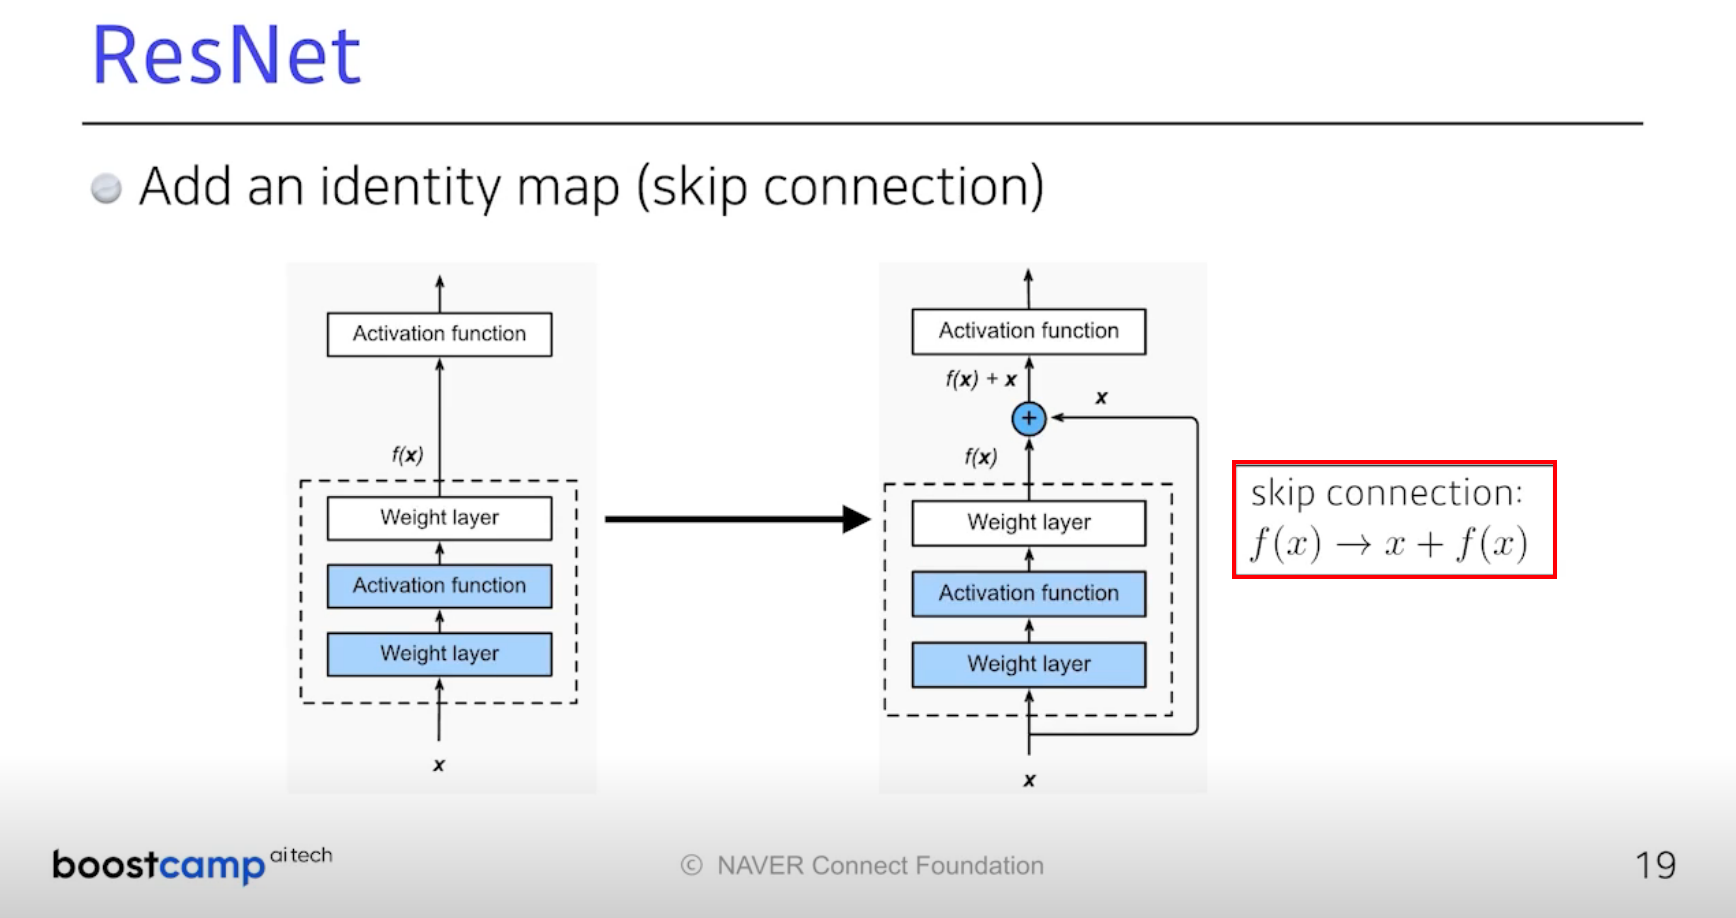
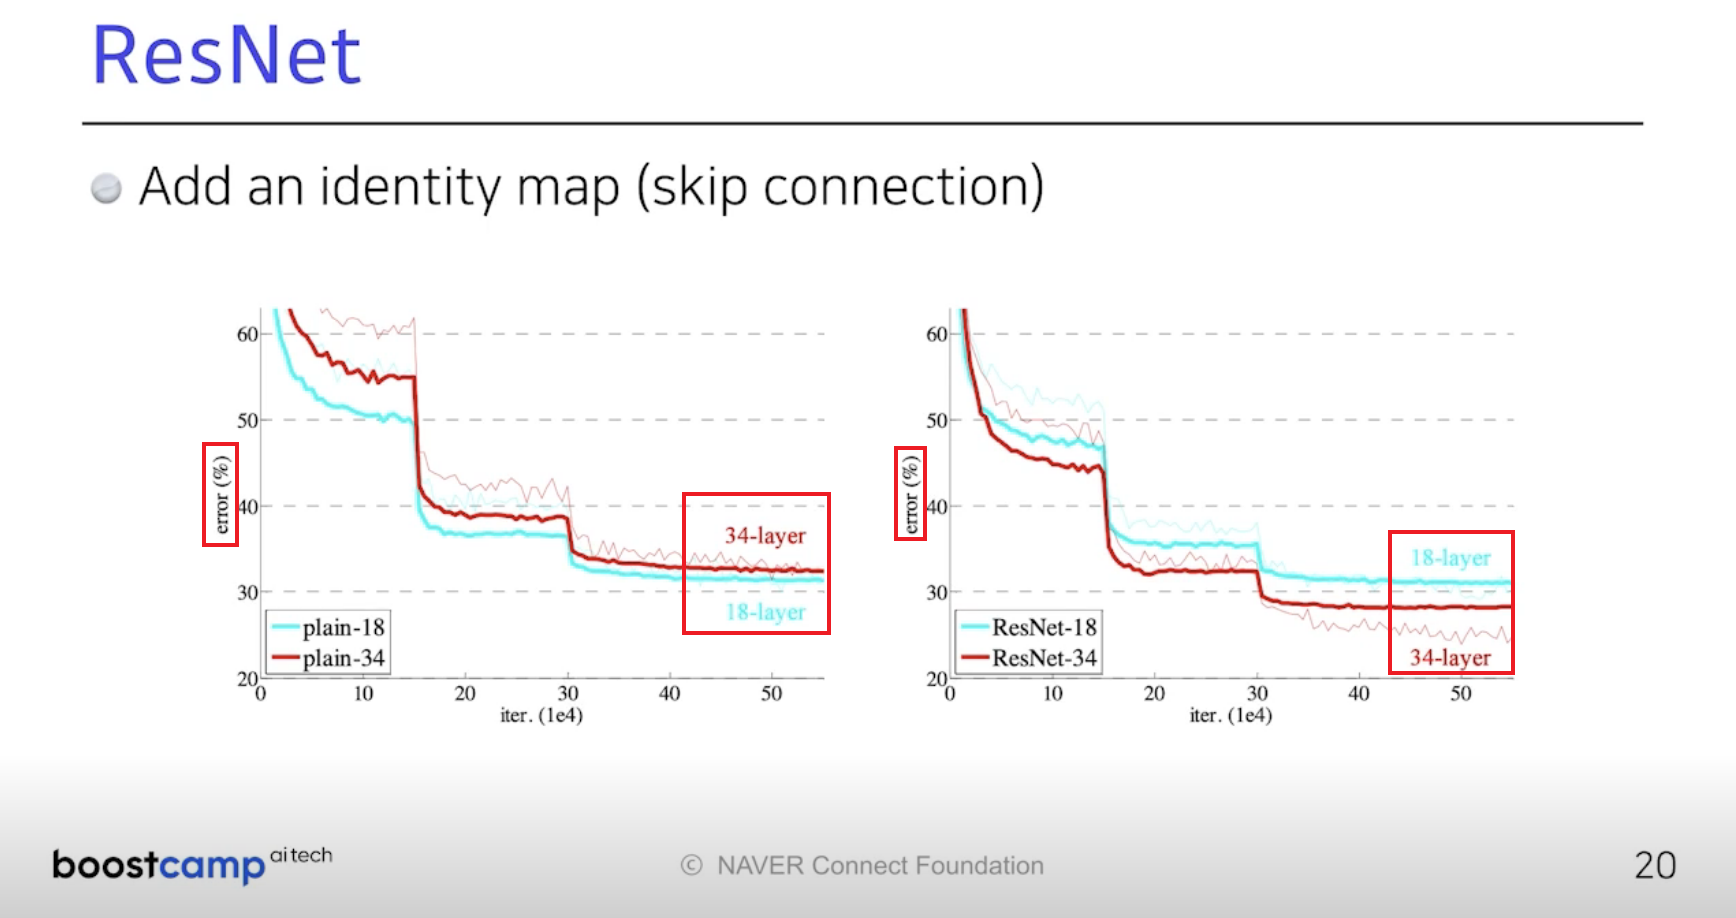
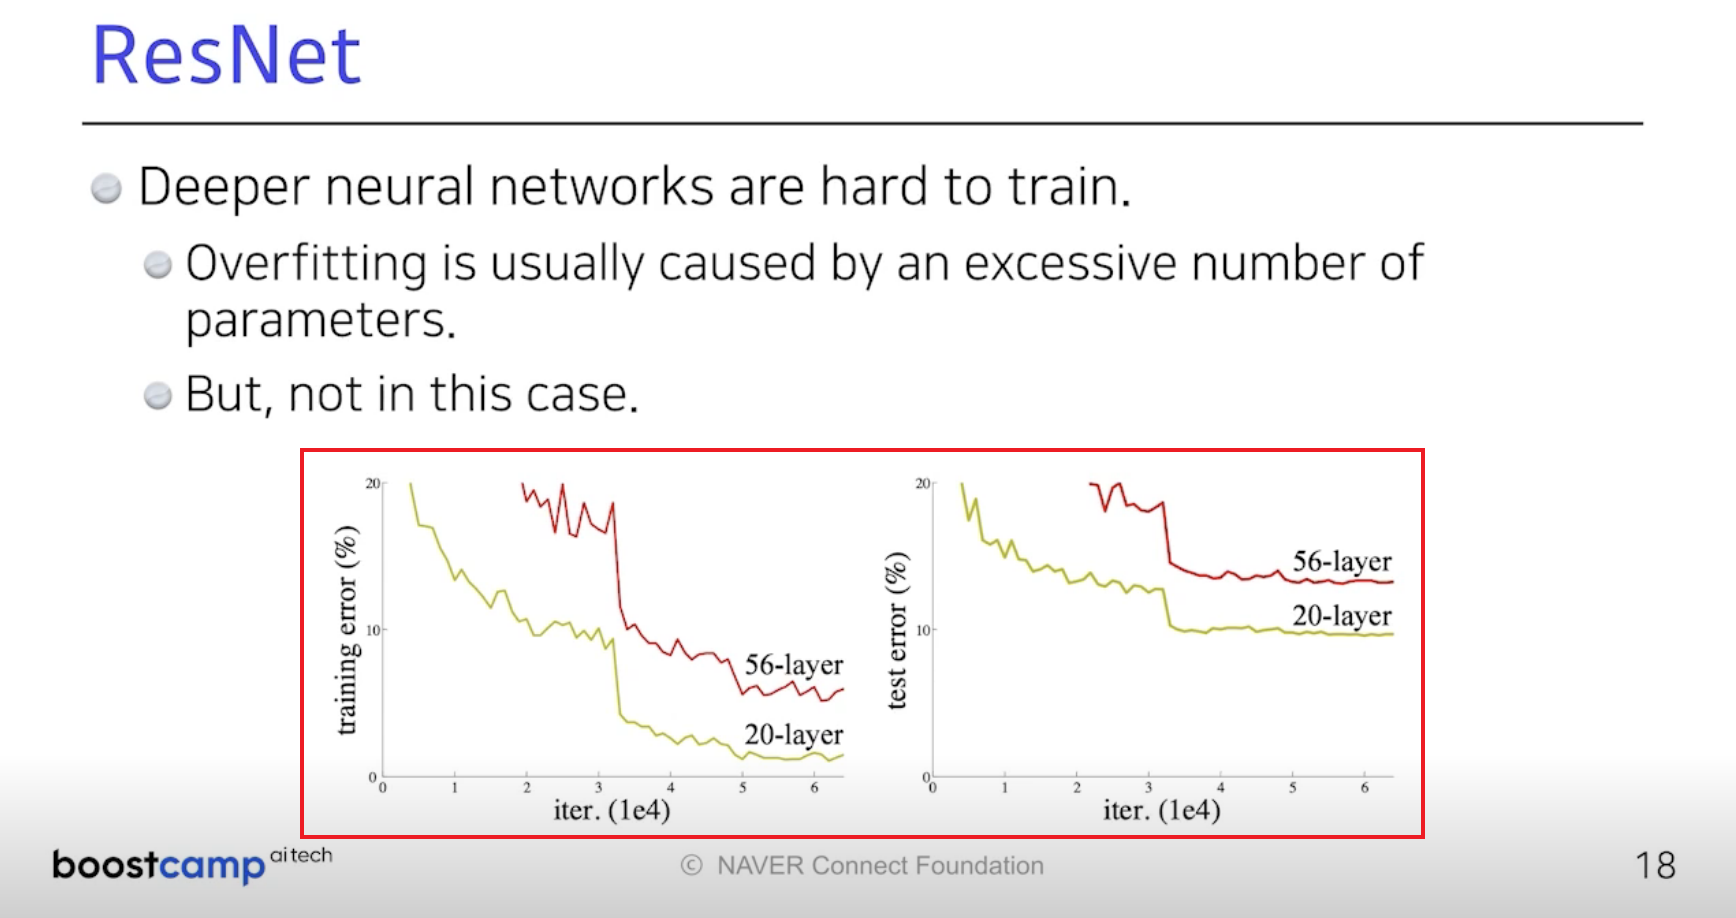

#### Simple Shortcut vs Projected Shortcut
f(x)에 x를 더하려면, 둘의 차원이 같아야 더할 수 있다. -> 그래서 차원을 맞춰추기 위해, 1x1 Conv를 사용해서 채널수를 맞춰주는게, Projected Shortcut이다.<br>
그런데, 실제로 잘 사용하진 않고, 주로 Simple Shortcut을 많이 사용한다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
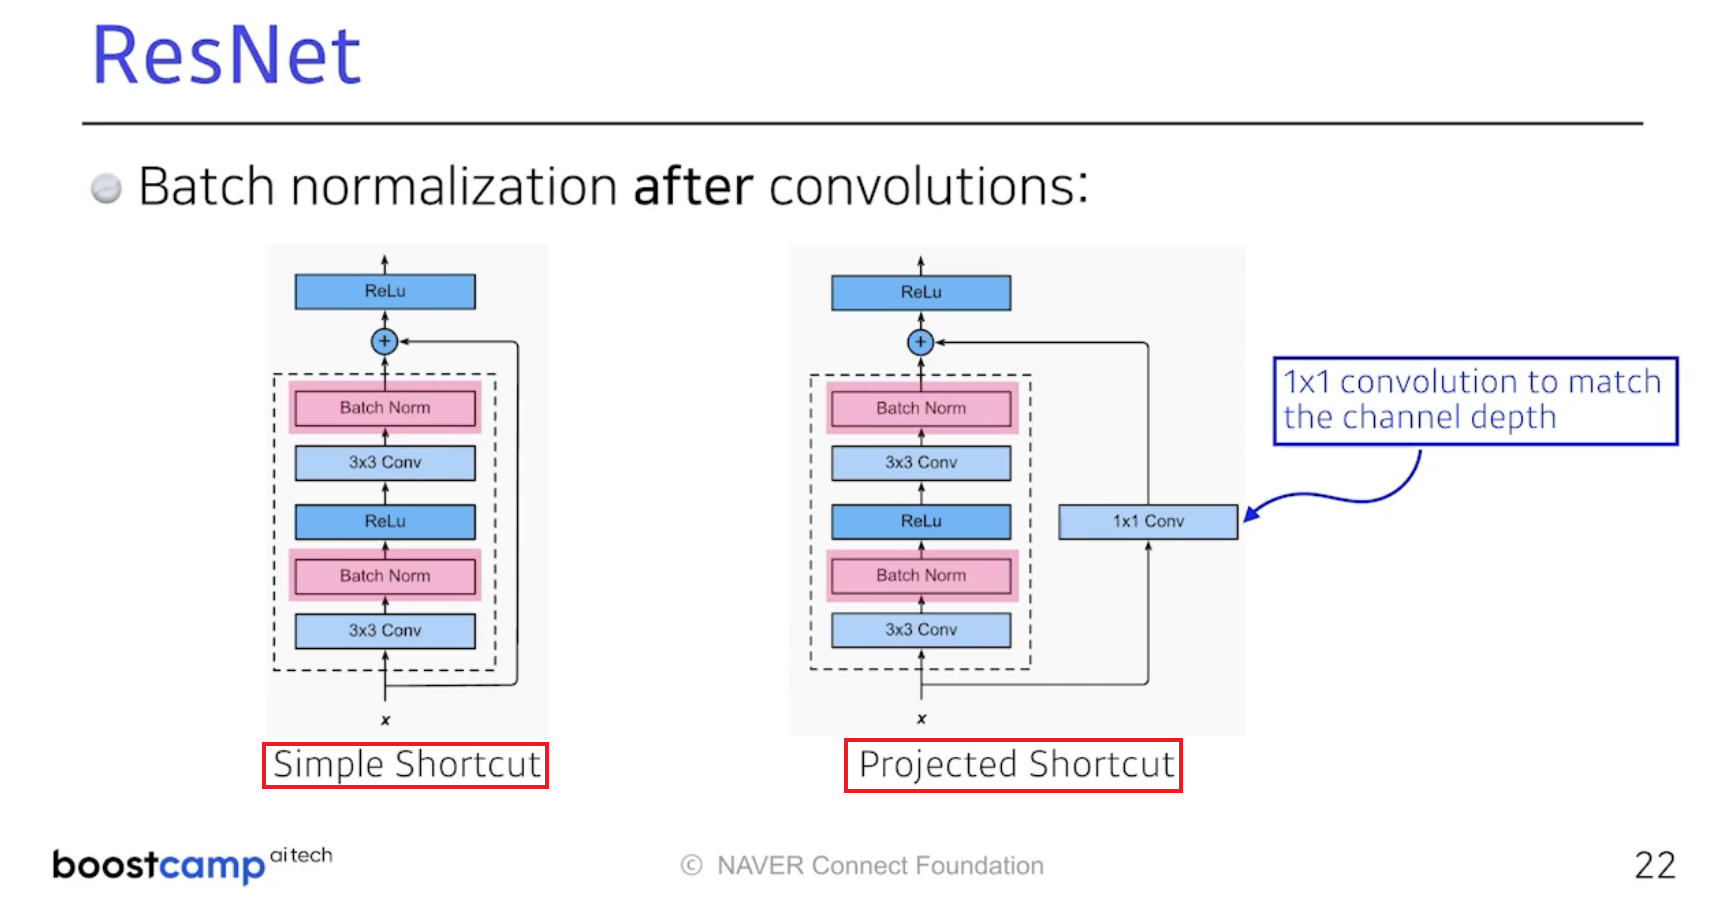

#### Bottleneck architecture
내가 3x3하기 전에 채널수를 줄이면 파라미터 개수가 줄어든다. 그래서 1x1로 채널수 줄이고 3x3하고, 다시 1x1로 채널수를 늘리는것을 보틀넥이라고 한다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
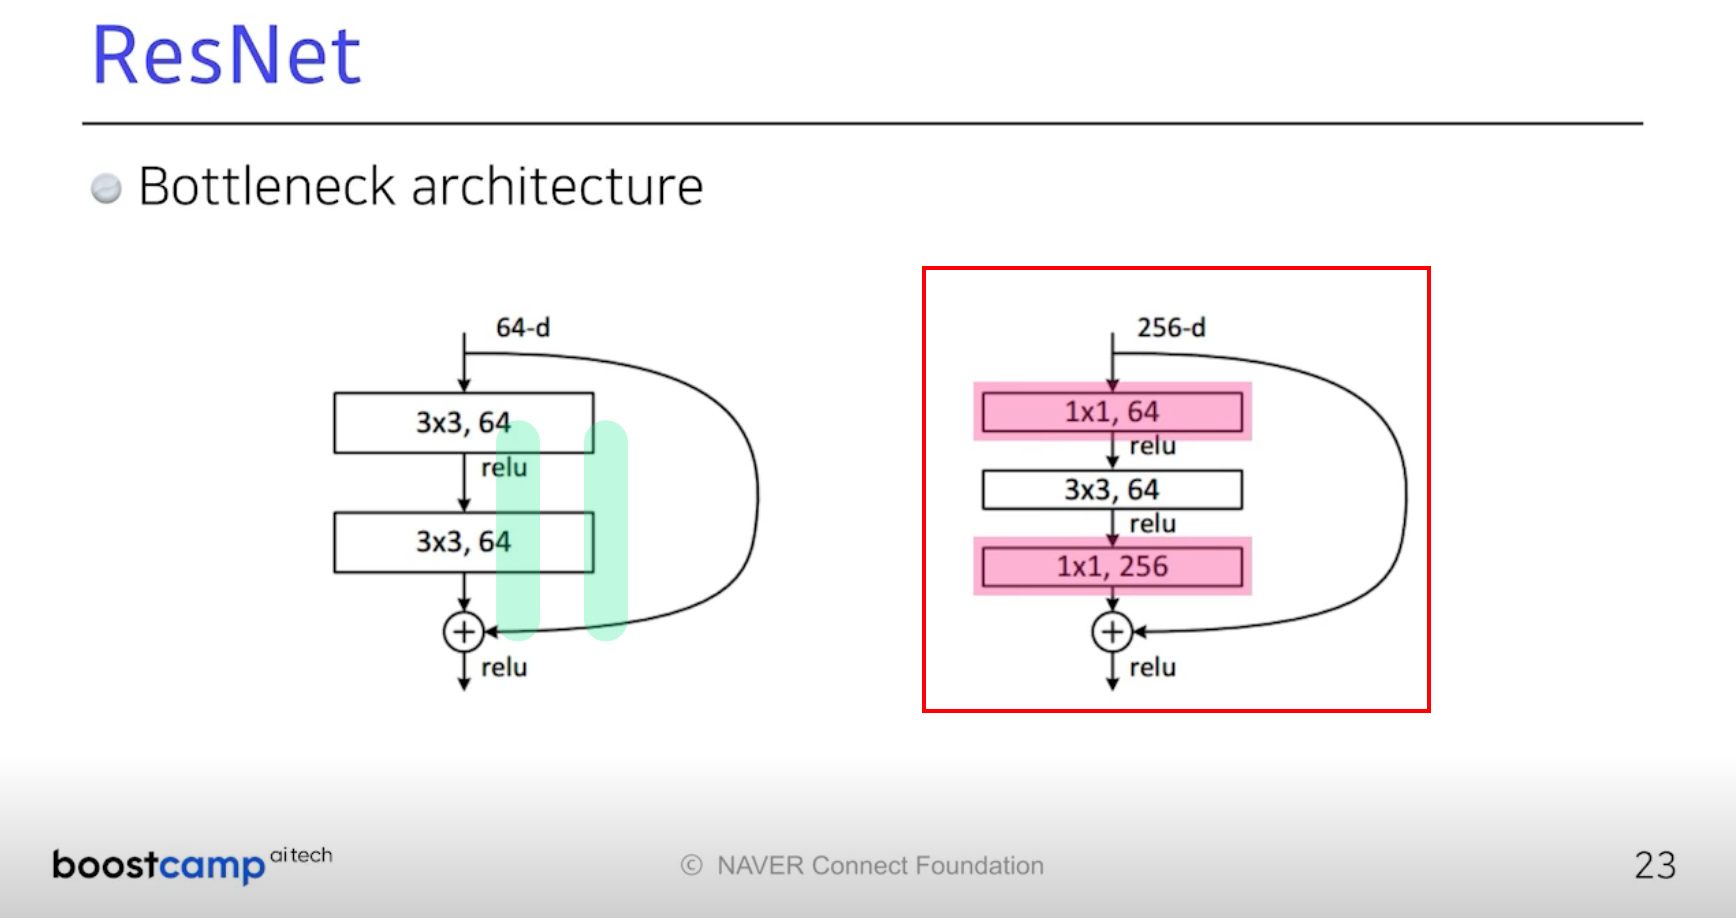

### ResNet까지 발전 의의
그래서 전체적으로 파라미터개수는 줄고, 덱스는 깊어지고, 성능은 증가하는 추세이다.<br>
그래프보면 Inception이 더 좋다고나오는데, 실제론 ResNet이 더 좋은것 같다.<br>
가장 중요한 개념은 1x1로 채널수를 줄이고, 3x3이나 5x5로 Conv 연산하고, 다시 1x1로 원하는 채널 맞춰주는 전략이다.<br>

### DenseNet
기존에 residual connection에서는 f(x)+x를 했는데, Dense Net에선 [f(x),x]로 concatenation(붙여주기)를 한다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>

<br>

그런데 이렇게 하면, 채널이 첫번째에 1번 커지고, 그다음에 2배, 4배, 8배로 기하급수적으로 채널수가 늘어난다.<br>
그러면 그에 비례하게 파라미터 개수도 기하급수적으로 커지므로, 좋지 않다.<br>
<br>
<div>
    <img src=attachment:image-2.png width=800>
</div>
<br>
<br>
그래서, Dense Block에서 concatenation으로 채널수를 기하급수적으로 늘리고, 마지막에 Batch Norm한번하고, 1x1Conv로 채널수 맞춰주고를 반복한다.<br>
이걸 계속 반복하는게 DenseNet이다. 요즘은 이게 성능이 최고다.<br>
<br>
<br>
<div>
    <img src=attachment:image-3.png width=800>
</div>
<br>
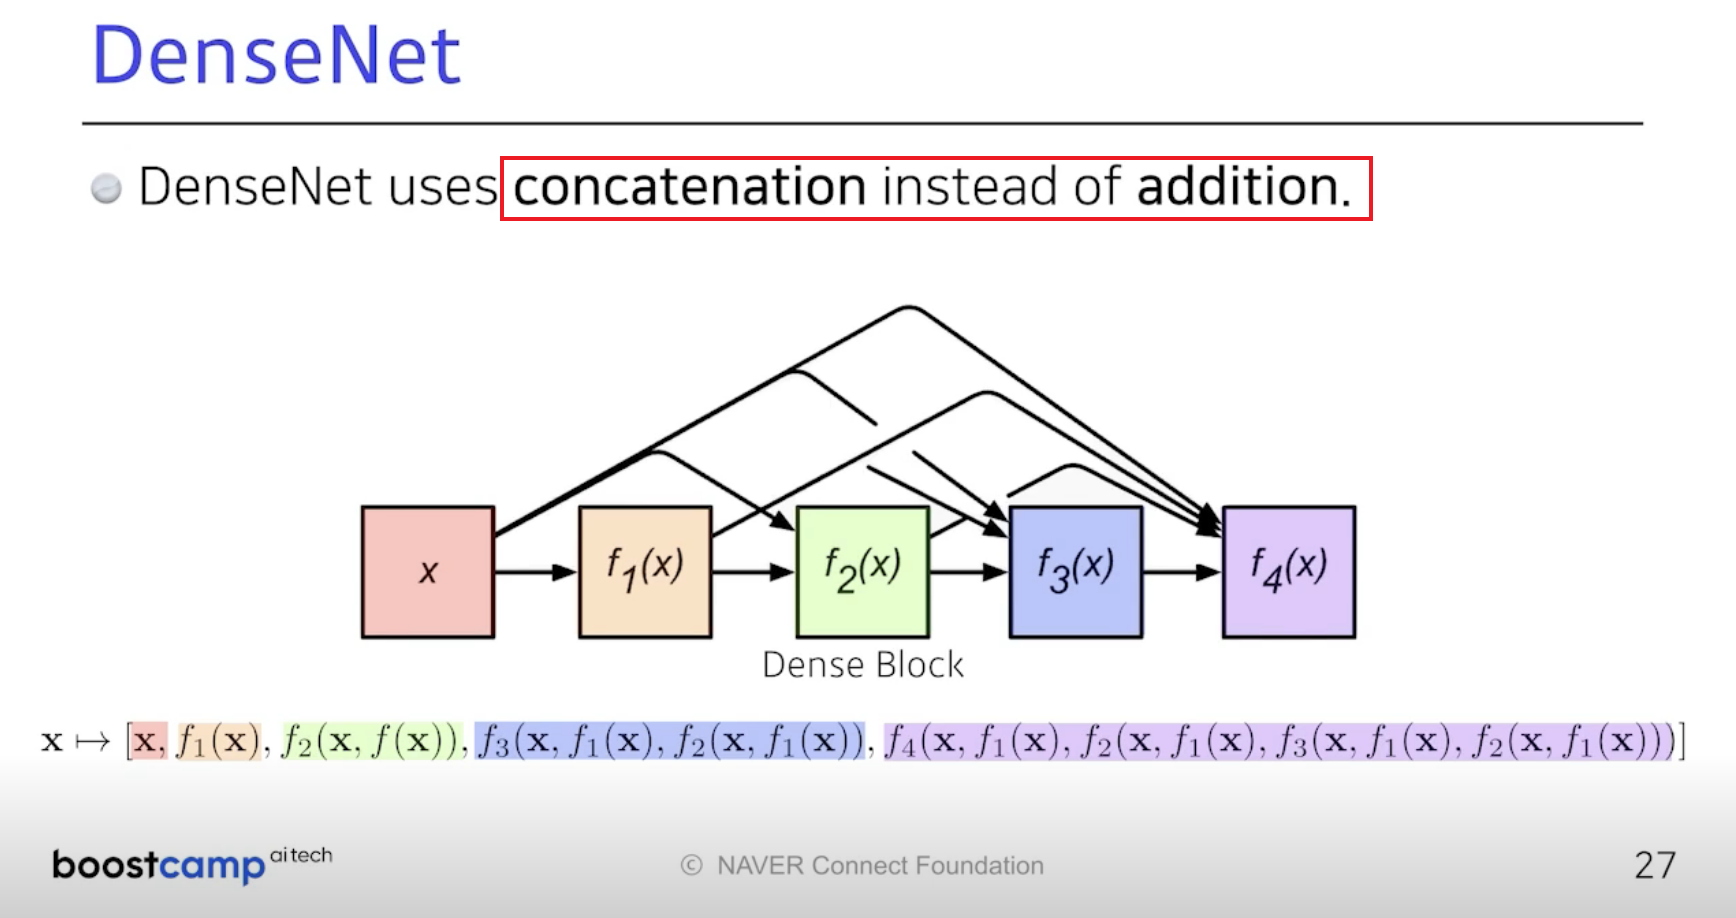
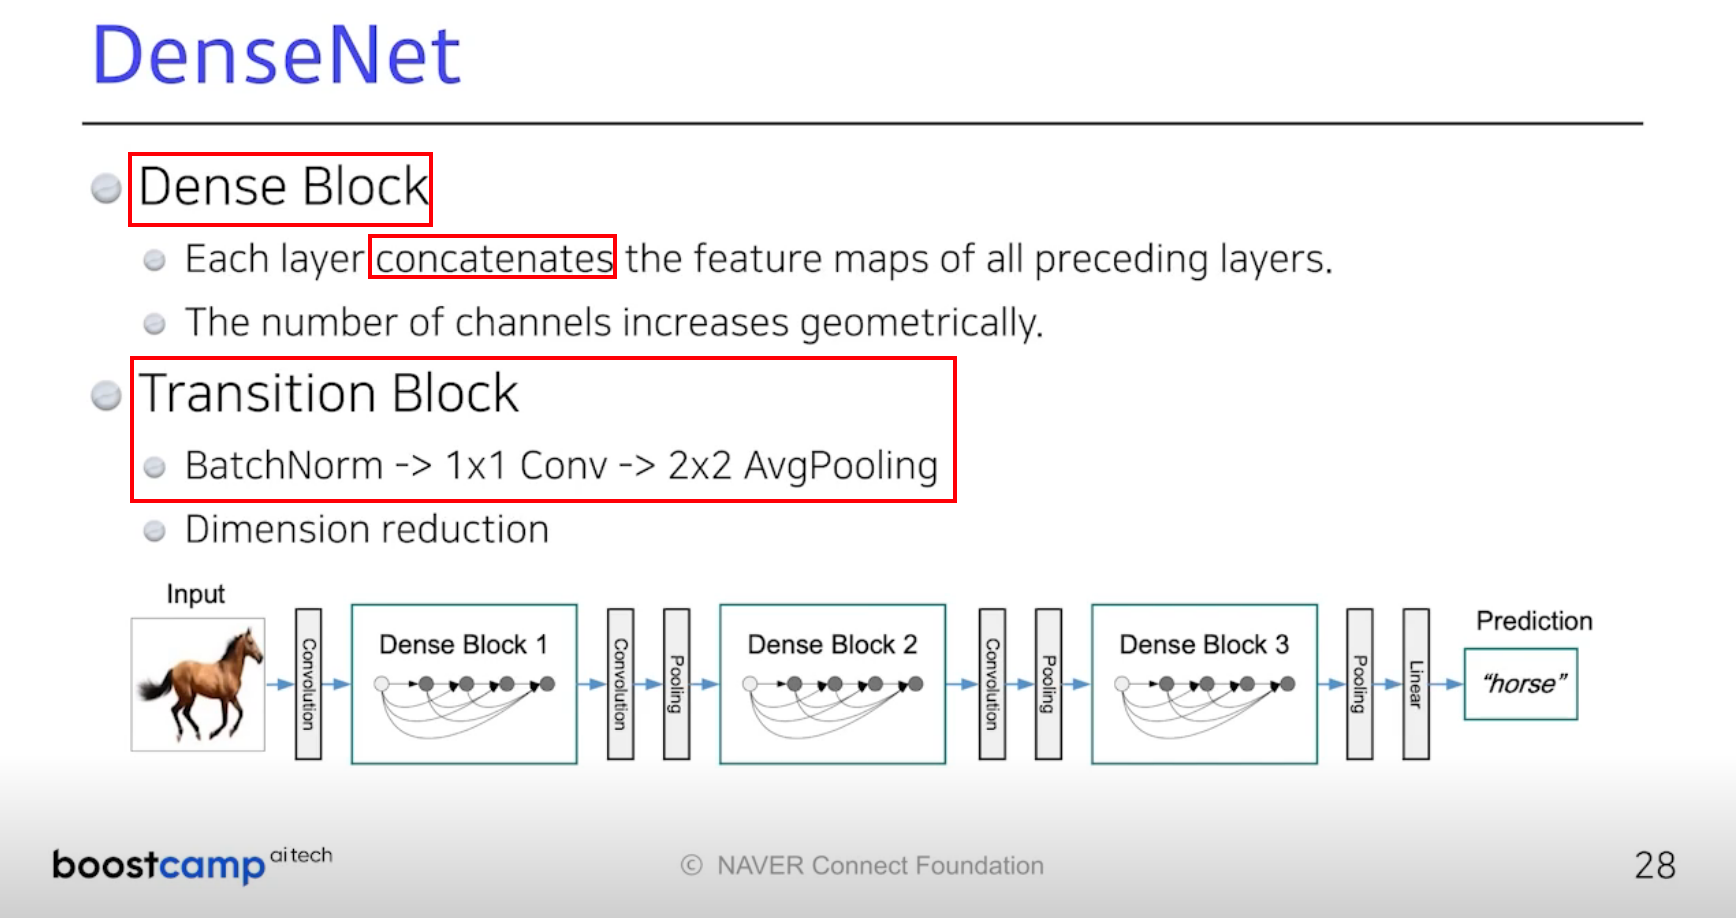
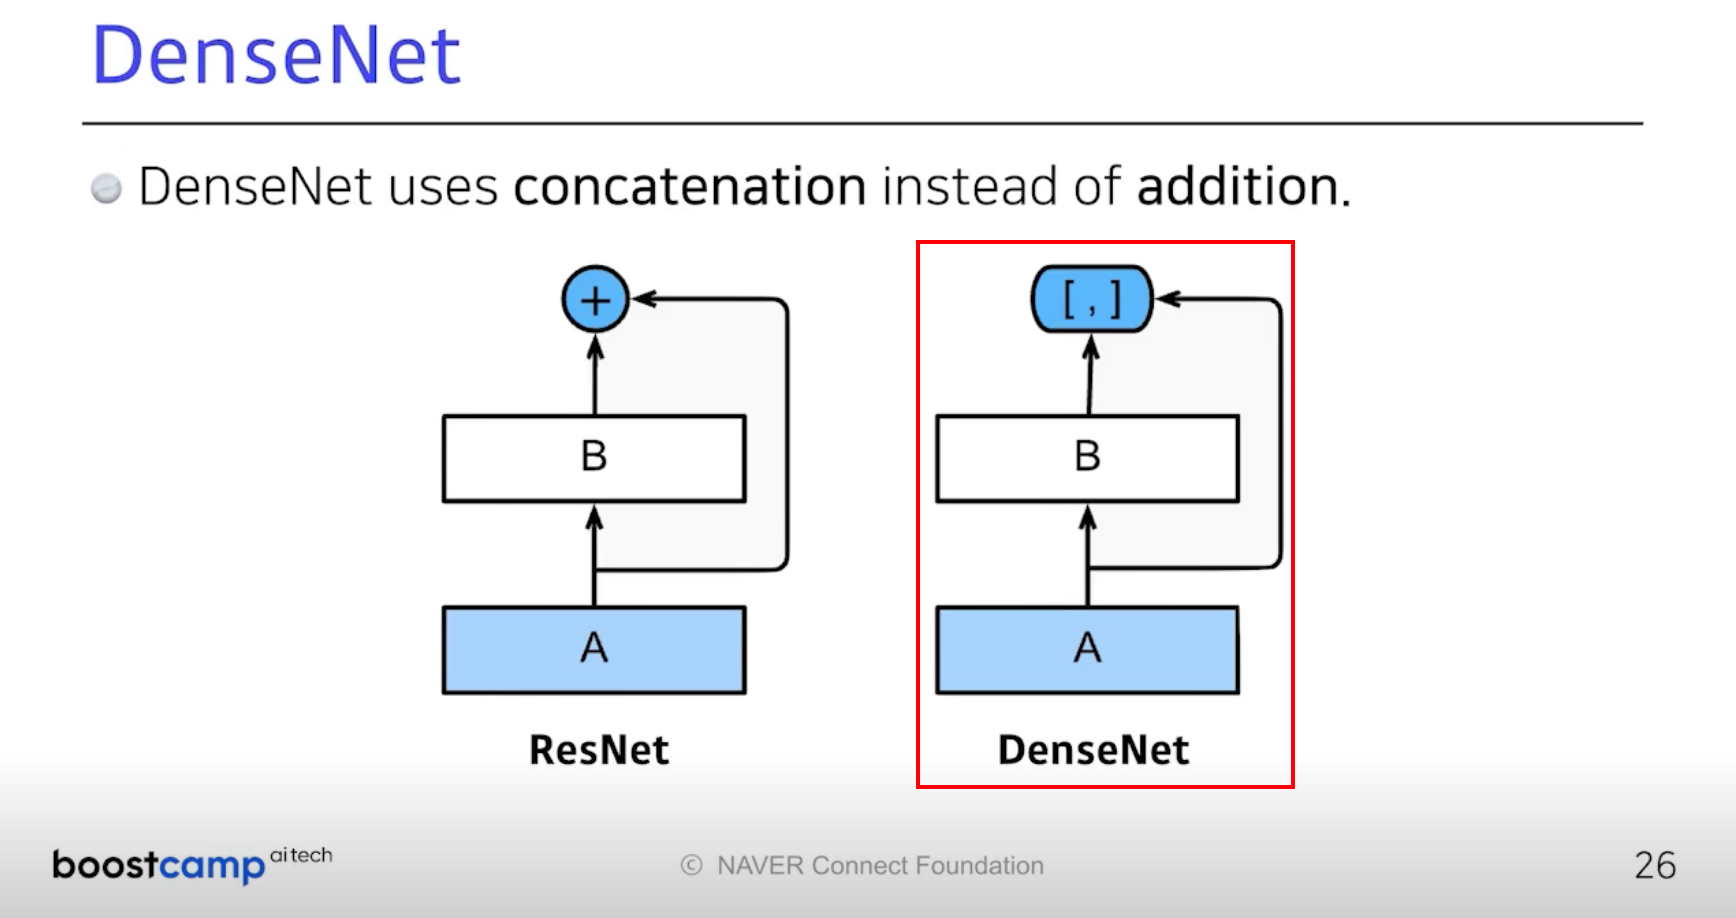

## Summary
VGG에서는 3x3필터만 사용을 통해 성능을 올렸고, GoogleNet에서 1x1로 채널수를 조절하기 시작했고,<br>
ResNet에서 skip-connection으로 네트워크를 깊게 쌓을 수 있었고, DenseNet에서는 concatenation으로 residual connection을 업그레이드 했다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>
<br>
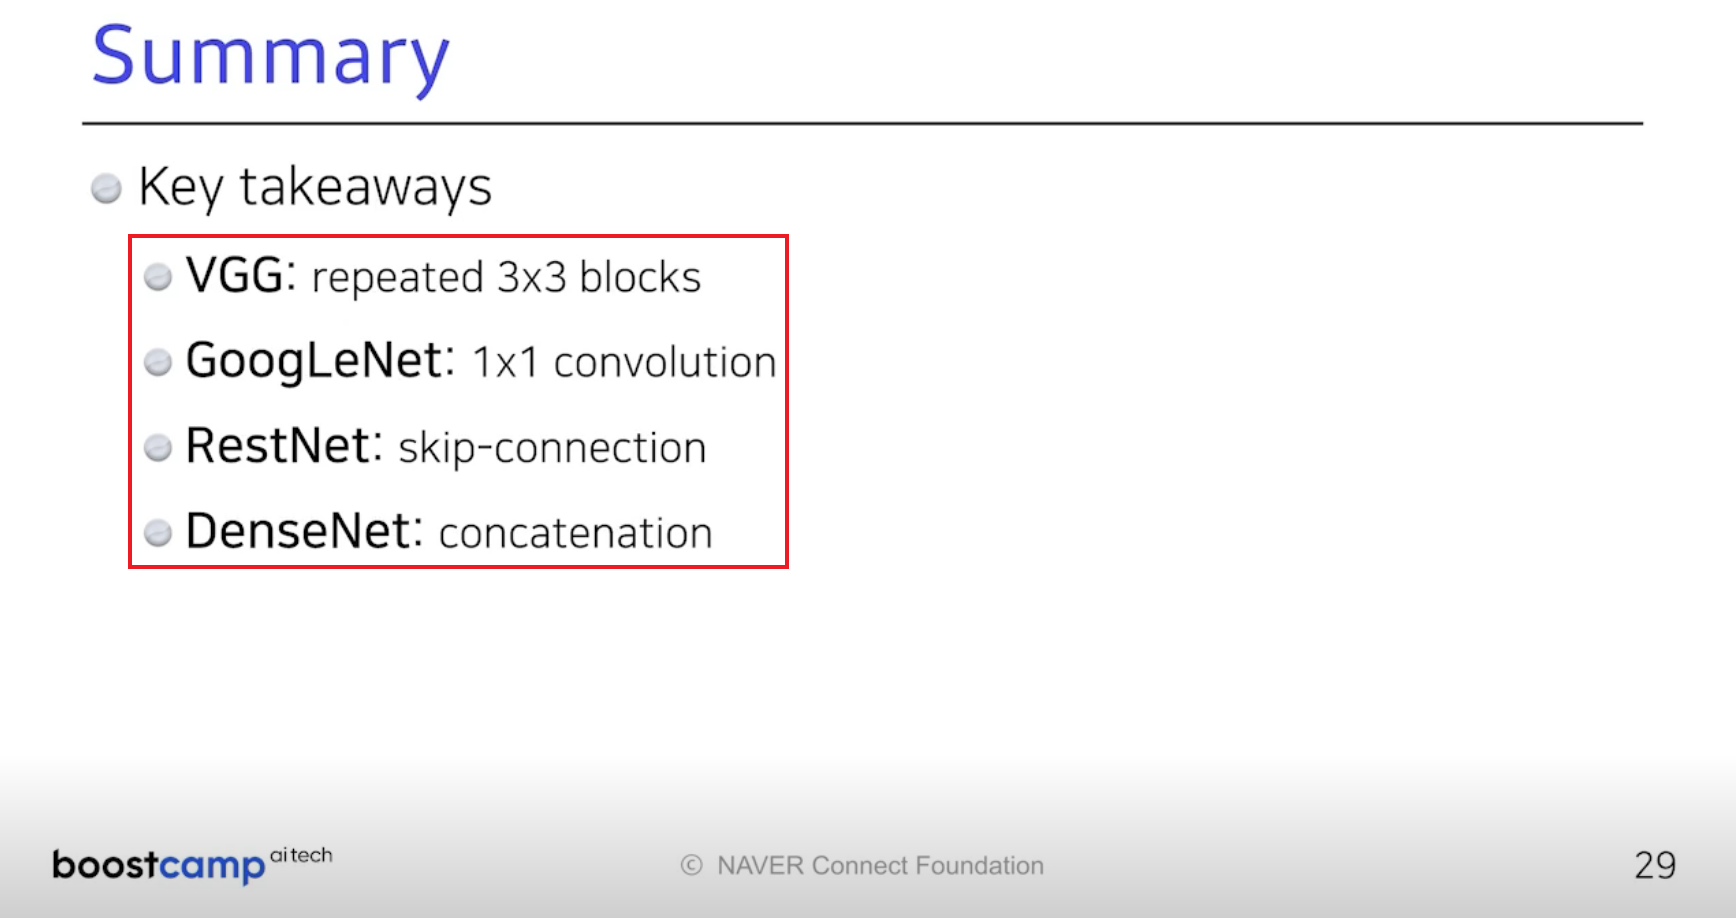